In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [200]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [201]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [202]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [203]:
test_df.index

RangeIndex(start=0, stop=418, step=1)

In [204]:
# Preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
# Đổi cột PassengerId thành cột ở đầu (cột index) (do cột PassengerId cũng chả làm được gì)
train_df.set_index(train_df["PassengerId"], inplace=True)

In [206]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [207]:
train_df.drop("PassengerId", axis=1, inplace=True) # or train_df = train_df.drop("PassengerId", axis=1)
# inplace default là False chỉ trả về bản sao thui k liên quan đến train_df, train_df vẫn còn cột PassengerId.
# Ngược lại, inplace=True thì xóa thẳng lun cột PassengerId

# axis=1 là cột
# inplace=True là xóa luôn cột PassengerID

In [208]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
# Cách khác để đổi cột PassengerId thành cột index
test_df = pd.read_csv("test.csv", index_col="PassengerId")

In [210]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


# 1. Feature Classification: Categorical vs Numerical 
## kiểu phân loại (hữu hạn) và kiểu số (vô hạn, nhiều)
* This help us select the appropriate plots for visualizaiton

#### Which features are categorical?
* Categorical Feature: nominal (chỉ có 2 loại), ordinal(theo thứ tự), ratio, interval
* To classify the sample into sets of similar samples

#### Which features are numerical?
* Numerical Feature: discrete (rời rạc), continuous(liên tục), timeseries(thời gian)
* These values change from sample to sample

In [211]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* Categorical: Survived, Pclass(odinal), Sex (nomial), SibSp, Parch, Embarked
* Numerical: Age(continuous), Fare(discrete)
* Mix types of data: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked
* Various Data Type: String, Int, Float

In [212]:
# Đổi thành kiểu dữ liệu category (phân loại)
train_df["Survived"] = train_df["Survived"].astype("category")

In [213]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [214]:
converted_features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

def convert_cat(df, features):
    for feature in features:
        train_df[feature] = train_df[feature].astype("category")

convert_cat(train_df, converted_features)
convert_cat(test_df, converted_features)

In [215]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


# 2. Exploratory Data Analysis (EDA: Phân tích khám phá dữ liệu)
### 2.1 Correlating categorical features
* Categorical: `Survised`, `Sex` (nomial), `Embarked`, `Pclass` (ordinal)
### Target Variable: `Survived`

In [218]:
# Xem bao nhiêu người còn sống sot
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [219]:
# normalize=True là xem theo kiểu tỷ lệ %
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Chỉ có 38% là survived. Vì z training data không cân bằng (50/50) nhưng không quá lệch vì thế xem xét sài kĩ thuật sampling (Sampling training data) để giải quyết sự không cân bằng
### `Sex`

In [220]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


Nếu chỉ xem dữ liệu Sex thì nó sẽ không nói lên được sex liên quan gì tới Survived nên phải liên kết với target variable là Survived bằng cách trực quan hóa dùng seaborn

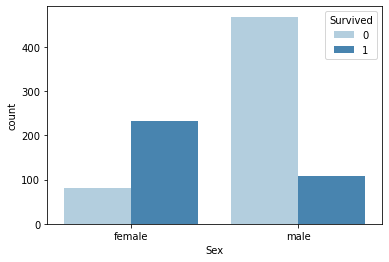

In [221]:
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Blues');

- Remaining Categorical Feature Columns

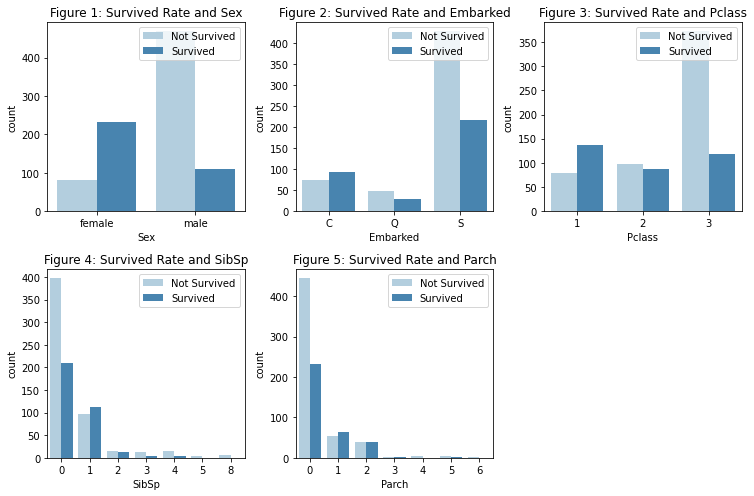

In [222]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

# ax[1,1] = sns.countplot(data=train_df, x='Sex')

for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col # để lặp qua từng index của cols
        if i < len(cols):
            ax_i = ax[row, col]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
            ax_i.set_title(f'Figure {i+1}: Survived Rate and {cols[i]}')
            # loc='upper right' là để label ở trên bên phải
            # nếu k gọi labels thì chú thích feature Survived là 0 vs 1
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

# Remove the last subplot (vì subplot cuối k có vẽ gì hết nên xóa đi cho dễ nhìn)            
ax.flat[-1].set_visible(False)

# làm cho subplot không đề chữ lên nhau
plt.tight_layout()

plt.show()

### Observation:
* **Survival Rate**:
    - Fig 1: Tỷ lệ sống sót Famale > Male
    - Fig 2: Tỷ lệ sống sót khi lên tàu ở cảng C cao nhất, nhiều người lên tàu ở S nhất nhưng không có tỷ lệ sống cao nhất
    - Fig 3: Tỷ lệ sống sót ở hạng nhất cao nhất, ở hạng 3 tỷ lệ chết nhiều nhất
    - Fig 4: Người đi với `SibSp`=0 hầu như chết, `SibSp`=1,2 có cơ hội sống cao
    - Fig 5: Người đi với `Parch`=0 hầu như chết, `SibSp`=1,2 có cơ hội sống cao


## 2.2. EDA for Numerical Features
* Numerical Features: (continuous) Age, Fare (dicrete)
### Age

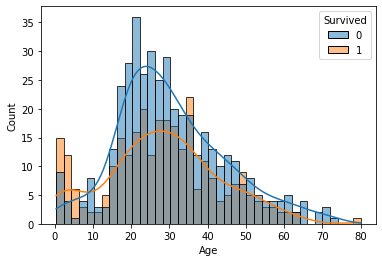

In [223]:
# bins=40 là chia khoảng độ tuổi = 40
# kde=True là đường atimate (đường cong)
sns.histplot(data=train_df, x='Age', hue='Survived', bins=40, kde=True);

* Đa số người đi tàu từ 16 -> 40 tuổi
* Trẻ em có tỉ lệ sống sót cao hơn những độ tuổi khác

### Fare

In [224]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

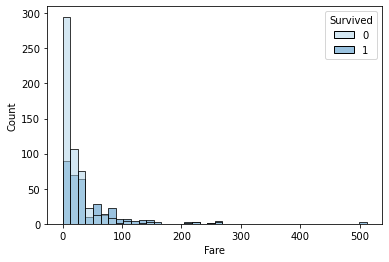

In [225]:
sns.histplot(data=train_df, x='Fare', hue="Survived", bins=40, palette='Blues');

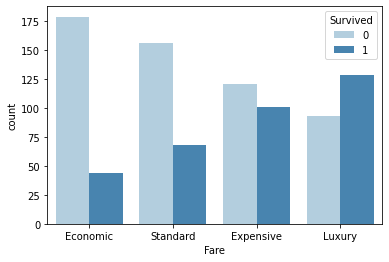

In [226]:
# Vì nhìn hình của Fare khá khó nhìn nên chia ra từng khoảng 0-25%, 25-50%, 50-75$, 75-100%

fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues');

In [227]:
train_df["Fare"]

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

# Feature Engineering

### 3.1 Name

In [228]:
train_df["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

* pattern trong tên hành khách có thể trích xuất thành danh xưng(Mr, Miss, Mrs, ...) bằng dấu "."

In [229]:
train_df["Title"] = train_df["Name"].str.extract('([A-Za-z]+)\.')
test_df["Title"] = test_df["Name"].str.extract('([A-Za-z]+)\.')

train_df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [230]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [231]:
def convert_title(title):
    if title in ["Ms", "Mile", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == "Mr":
        return "Mr"
    elif title == "Master":
        return "Master"
    else:
        return "Other"
        
train_df["Title"] = train_df["Title"].map(convert_title)
test_df["Title"] = test_df["Title"].map(convert_title)

train_df["Title"].value_counts()

Mr        517
Miss      183
Mrs       126
Master     40
Other      25
Name: Title, dtype: int64

* Triết xuất danh xưng xong thì biến "Name" không cần nữa -> xóa nó đi = lệnh drop

In [232]:
train_df.drop("Name", axis=1, inplace=True)
test_df.drop("Name", axis=1, inplace=True)

In [233]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 3.2 Ticket

In [234]:
train_df["Ticket"]

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

* Biến Ticket cũng không cần thiêt -> bỏ

In [235]:
train_df.drop("Ticket", axis=1, inplace=True)
test_df.drop("Ticket", axis=1, inplace=True)

In [236]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
2,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
3,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
4,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
5,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


### 3.3 Cabin

In [237]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    object  
 8   Embarked  889 non-null    category
 9   Title     891 non-null    object  
dtypes: category(6), float64(2), object(2)
memory usage: 41.2+ KB


In [238]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
 8   Survived  418 non-null    int64  
 9   Title     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ KB


* Ta thấy Cabin có nhiều missing values ở cả train và test data (hơn 77%) -> xóa lun

In [239]:
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

### 3.4 Age

* Age cũng có missing data nhưng không quá nhiều
* Ở phần EDA for Numerical Features thì độ tuổi dũng quyết định khá nhiều vào việc sống sót -> không xóa biến Age

* Điền vào những chỗ null của age bằng giá trị bình của từng danh xưng (Title)

In [240]:
train_df.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.816327
Mr        32.368090
Mrs       35.788991
Other     43.750000
Name: Age, dtype: float64

In [241]:
data = [train_df, test_df]
for df in data:
    df.loc[(df.Age.isnull()) & (df.Title == "Master"), "Age"] = 5
    df.loc[(df.Age.isnull()) & (df.Title == "Miss"), "Age"] = 22
    df.loc[(df.Age.isnull()) & (df.Title == "Mr"), "Age"] = 32
    df.loc[(df.Age.isnull()) & (df.Title == "Mrs"), "Age"] = 36
    df.loc[(df.Age.isnull()) & (df.Title == "Other"), "Age"] = 44

### 3.5 Fare

In [242]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    category
 5   Parch     891 non-null    category
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
 8   Title     891 non-null    object  
dtypes: category(6), float64(2), object(1)
memory usage: 34.3+ KB


In [243]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Survived  418 non-null    int64  
 8   Title     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 32.7+ KB


* Trong train data biến Fare k bị missing data 
* Trong test data biến Fare bị missing 1 data

In [244]:
test_df.loc[(test_df.Fare.isnull())]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Title
PassengerId,,,,,,,,,
1044,3,male,60.5,0,0,NaN,S,0,Mr


* Vì giá vé thường liên quan đến tuổi(Age) or người đó đi hạng gì(Pclass: thương gia, thường, ...).
* Ở đây tôi dựa vào Pclass -> điền vị trí Null của Fare bằng mean của Pclass
* Pclass = 3 nên tính mean Pclass của 3

In [245]:
mean_Pclass_3 = train_df.groupby("Pclass").mean()["Fare"][3]

In [246]:
# điền mean Plclass 3 vào Fare bị null
test_df.Fare.fillna(mean_Pclass_3, inplace=True)

### 3.6 SibSp and Parch

* Do nothing

### 3.7 Categorical Variable Encoding

* Vì các biến Sex, Embarked, Title thuộc kiểu categorical, nên cần phải mã hóa(encode) thành kiểu dạng số mới đưa vào model để train

In [247]:
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked", "Title"])
test_df = pd.get_dummies(test_df, columns=["Sex", "Embarked", "Title"])

In [248]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0
5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0


# 4. Model Building

### 4.1 Splitting Dataset

In [249]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df.Survived

X_test = test_df.copy().drop("Survived", axis=1)

### 4.2 Feature Scaling

In [250]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [252]:
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [253]:
import time
start_time_nb = time.time()
nb.fit(X_train_scaled, y_train)
end_time_nb = time.time()
training_time_nb = end_time_nb - start_time_nb
print(training_time_nb)


0.003996133804321289


In [254]:
start_time_knn = time.time()
knn.fit(X_train_scaled, y_train)
end_time_knn = time.time()
training_time_knn = end_time_knn - start_time_knn
print(training_time_knn)

0.003994941711425781


In [255]:
start_time_dt = time.time()
dt.fit(X_train_scaled, y_train)
end_time_dt = time.time()
training_time_dt = end_time_dt - start_time_dt
print(training_time_dt)

0.003995180130004883


In [256]:
%%time
y_pred_knn = knn.predict(X_train_scaled)


CPU times: total: 46.9 ms
Wall time: 36 ms


In [257]:
%%time
y_pred_nb = nb.predict(X_train_scaled)

CPU times: total: 0 ns
Wall time: 0 ns


In [258]:
%%time
y_pred_dt = dt.predict(X_train_scaled)

CPU times: total: 0 ns
Wall time: 0 ns


# Train

In [259]:
print(confusion_matrix(y_train, y_pred_knn))
print(classification_report(y_train, y_pred_knn))

[[502  47]
 [ 71 271]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       549
           1       0.85      0.79      0.82       342

    accuracy                           0.87       891
   macro avg       0.86      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891



In [260]:
print(confusion_matrix(y_train, y_pred_nb))
print(classification_report(y_train, y_pred_nb))

[[461  88]
 [ 82 260]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       549
           1       0.75      0.76      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



In [261]:
print(confusion_matrix(y_train, y_pred_dt))
print(classification_report(y_train, y_pred_dt))

[[547   2]
 [ 13 329]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



# Test

In [262]:
y_pred_knn = knn.predict(X_test_scaled)
y_pred_nb = nb.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)
y_test = test_df["Survived"].values

In [263]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[206  54]
 [ 42 116]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       260
           1       0.68      0.73      0.71       158

    accuracy                           0.77       418
   macro avg       0.76      0.76      0.76       418
weighted avg       0.77      0.77      0.77       418



In [264]:
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[200  60]
 [ 42 116]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       260
           1       0.66      0.73      0.69       158

    accuracy                           0.76       418
   macro avg       0.74      0.75      0.75       418
weighted avg       0.76      0.76      0.76       418



In [265]:
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[195  65]
 [ 56 102]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       260
           1       0.61      0.65      0.63       158

    accuracy                           0.71       418
   macro avg       0.69      0.70      0.70       418
weighted avg       0.71      0.71      0.71       418



### Kết luận
* Ta thấy ở tập train Decision Tree có độ chính xác cao nhất và tập test thì kNN có độ chính xác cao nhất.
* kNN có testing time cao nhất vì dataset có khá nhiều dòng dữ liệu.
* Gausian Naive Bayes testing time nhanh nhất.
* Decision Tree có training time nhanh nhất.